In [98]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split


In [99]:
df=pd.read_csv('Loan_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
df.shape

(614, 13)

In [101]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [103]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


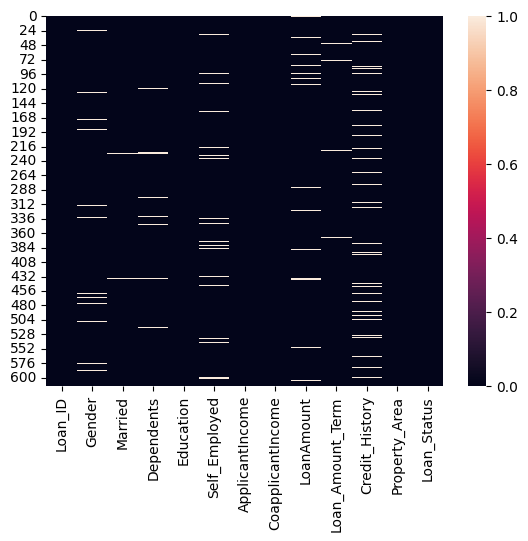

In [104]:
#Checking the null values in dataset through visualization
sns.heatmap(df.isna());

In [105]:
#now dropping the missing values 
df=df.dropna()

In [106]:
#checking the missing values

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
df.Loan_Status=df.Loan_Status.map({'Y':1,'N':0})

In [108]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [154]:
df['Credit_History'].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

In [109]:
#checking the  total catageory of columns 
df.Property_Area.value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [110]:
df.Dependents.value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [111]:
#Changing the 3+ to 4 bcz we cannot apply model on 3+
df.Dependents=df.Dependents.replace({'3+':4})

In [112]:
df.Dependents.value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

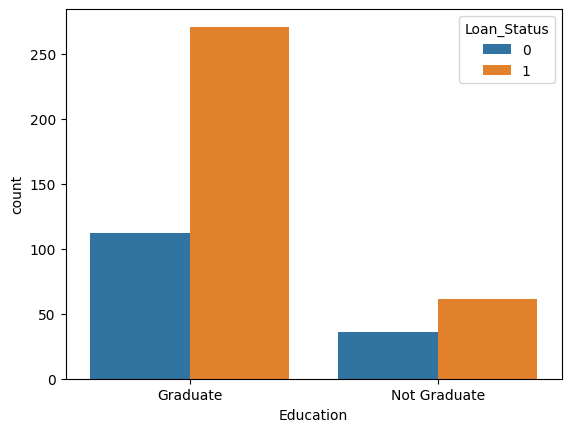

In [113]:
# Checking the visualization of relation between columns 
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

<Axes: xlabel='Gender', ylabel='count'>

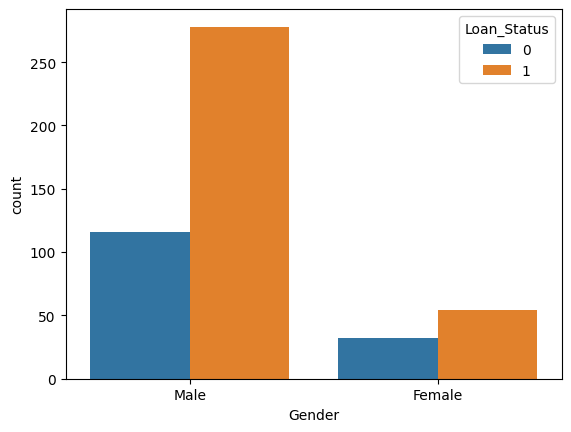

In [114]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

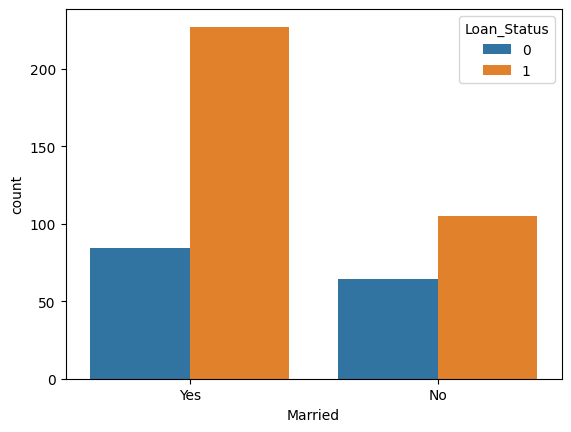

In [115]:
sns.countplot(x=df['Married'],hue=df['Loan_Status']);

In [116]:
#Now replacing the catagories of columns to integers
df.replace({'Gender':{'Male':1,'Female':0},
            'Married':{'Yes':1,'No':0},
            'Education':{'Graduate':1,'Not Graduate':0},
            'Self_Employed':{'Yes':1,'No':0},
            'Property_Area':{'Rural':0,'Urban':1,'Semiurban':3}},inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15248\3806904826.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':1,'Female':0},


In [130]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [135]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df.iloc[:,-1]
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [143]:
#Now Applying the model 
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [144]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [145]:
ypredicted=model.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(ypredicted,y_test)

0.7604166666666666

In [147]:
model.score(X_train,y_train)

0.7734375

In [148]:
model.score(X_test,y_test)

0.7604166666666666

In [151]:
from sklearn.metrics import classification_report
print(classification_report(ypredicted,y_test))

              precision    recall  f1-score   support

           0       0.37      0.73      0.49        15
           1       0.94      0.77      0.84        81

    accuracy                           0.76        96
   macro avg       0.65      0.75      0.67        96
weighted avg       0.85      0.76      0.79        96



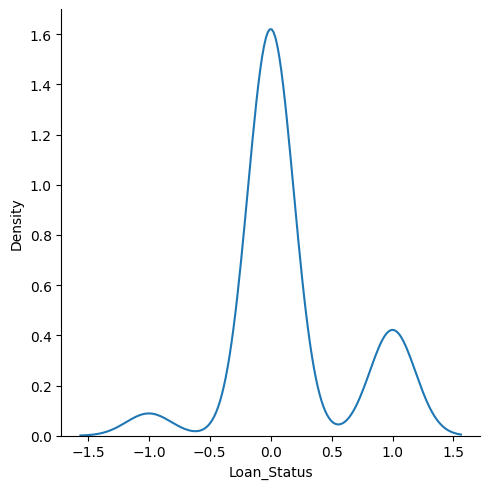

In [153]:
sns.displot(ypredicted-y_test,kind='kde');